Part 2 Data Wrangling

In [79]:
# Import needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os
import scipy
from IPython.display import display_html
def display_side_by_side(*args):
   html_str=''
   for df in args:
       html_str+=df.to_html()
   display_html(html_str.replace('table','table style="display:inline"'),raw=True)
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

ModuleNotFoundError: No module named 'plotly'

In [20]:
# Read in our file of data
df = pd.read_csv("2012-18_officialBoxScore.csv")
df.drop_duplicates( keep='first',inplace=True)

In [21]:
# Break up data frame to just the dates, team result, team free throws
DateRsltFta = df

wins = DateRsltFta[DateRsltFta['teamRslt'] == 'Win']
loss = DateRsltFta[DateRsltFta['teamRslt'] == 'Loss']

# Break up dataframes for each season
mask1213 = (DateRsltFta['gmDate'] >= '2012-10-30') & (DateRsltFta['gmDate'] <= '2013-04-17')
season1213 = DateRsltFta.loc[mask1213]

mask1314 = (DateRsltFta['gmDate'] >= '2013-10-29') & (DateRsltFta['gmDate'] <= '2014-04-16')
season1314 = DateRsltFta.loc[mask1314]

mask1415 = (DateRsltFta['gmDate'] >= '2014-10-28') & (DateRsltFta['gmDate'] <= '2015-04-15')
season1415 = DateRsltFta.loc[mask1415]

mask1516 = (DateRsltFta['gmDate'] >= '2015-10-27') & (DateRsltFta['gmDate'] <= '2016-04-13')
season1516 = DateRsltFta.loc[mask1516]

mask1617 = (DateRsltFta['gmDate'] >= '2016-10-25') & (DateRsltFta['gmDate'] <= '2017-04-12')
season1617 = DateRsltFta.loc[mask1617]

mask1718 = (DateRsltFta['gmDate'] >= '2017-10-17') & (DateRsltFta['gmDate'] <= '2018-04-11')
season1718 = DateRsltFta.loc[mask1718]



In [22]:
# Break up data frame to see which team shot more free throws

# Season 2012-2013
moreFTA1213 = season1213[season1213['teamFTA'] > season1213['opptFTA']]
moreFTA1213.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1213Win = sum(moreFTA1213['teamRslt'] == 'Win')
sumMoreFTA1213Loss = sum(moreFTA1213['teamRslt'] == 'Loss')


moreFTA1213copy = moreFTA1213 
moreFTA1213copy.teamRslt[moreFTA1213copy.teamRslt == 'Win'] = 1
moreFTA1213copy.teamRslt[moreFTA1213copy.teamRslt == 'Loss'] = 0


# Season 2013-2014
moreFTA1314 = season1314[season1314['teamFTA'] > season1314['opptFTA']]
moreFTA1314.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1314Win = sum(moreFTA1314['teamRslt'] == 'Win')
sumMoreFTA1314Loss = sum(moreFTA1314['teamRslt'] == 'Loss')

# Season 2014-2015
moreFTA1415 = season1415[season1415['teamFTA'] > season1415['opptFTA']]
moreFTA1415.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1415Win = sum(moreFTA1415['teamRslt'] == 'Win')
sumMoreFTA1415Loss = sum(moreFTA1415['teamRslt'] == 'Loss')

# Season 2015-2016
moreFTA1516 = season1516[season1516['teamFTA'] > season1516['opptFTA']]
moreFTA1516.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1516Win = sum(moreFTA1516['teamRslt'] == 'Win')
sumMoreFTA1516Loss = sum(moreFTA1516['teamRslt'] == 'Loss')

# Season 2016-2017
moreFTA1617 = season1617[season1617['teamFTA'] > season1617['opptFTA']]
moreFTA1617.drop_duplicates( keep='first',inplace=True)
sumMoreFTA1617Win = sum(moreFTA1617['teamRslt'] == 'Win')
sumMoreFTA1617Loss = sum(moreFTA1617['teamRslt'] == 'Loss')

# Season 2017-2018
moreFTA1718 = season1718[season1718['teamFTA'] > season1718['opptFTA']]
moreFTA1718.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1718Win = sum(moreFTA1718['teamRslt'] == 'Win')
sumMoreFTA1718Loss = sum(moreFTA1718['teamRslt'] == 'Loss')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactives

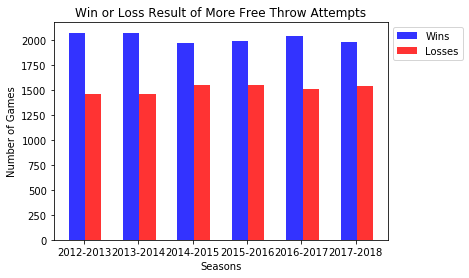

<Figure size 1080x1080 with 0 Axes>

In [23]:
seasons = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']
wins = [sumMoreFTA1213Win, sumMoreFTA1314Win, sumMoreFTA1415Win, sumMoreFTA1516Win, sumMoreFTA1617Win, sumMoreFTA1718Win]
losses = [sumMoreFTA1213Loss, sumMoreFTA1314Loss, sumMoreFTA1415Loss, sumMoreFTA1516Loss, sumMoreFTA1617Loss, sumMoreFTA1718Loss]
# WinAndLossDf = pd.DataFrame(seasons,columns=['Seasons'])
# WinAndLossDf['Games Won'] = wins
# WinAndLossDf['Games Lost'] = losses
# WinAndLossDf.plot(x="Seasons", y=["Games Won", "Games Lost"],kind="bar", width=.4).legend(bbox_to_anchor=(1, 1))

# create plt
fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, wins, bar_width,
alpha=opacity,
color='b',
label='Wins')

rects2 = plt.bar(index + bar_width, losses, bar_width,
alpha=opacity,
color='r',
label='Losses')

plt.xlabel('Seasons')
plt.ylabel('Number of Games')
plt.title('Win or Loss Result of More Free Throw Attempts')
plt.xticks(index + bar_width-.17, seasons)
plt.legend()
plt.figure(figsize=(15,15))
# # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

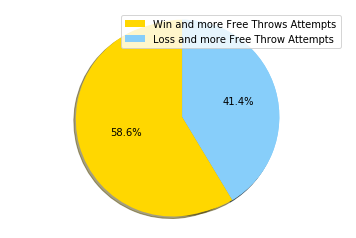

In [24]:
# For better visual, with a pie chart

labels = 'Win and more Free Throws Attempts', 'Loss and more Free Throw Attempts'
colors = ['gold', 'lightskyblue']
sizes = [sumMoreFTA1213Win, sumMoreFTA1213Loss]
explode = (0.1, 0)

patches,texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc="best")
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [25]:

# NBA Team Ranings 2012 - 2013

rank1 = pd.read_csv('12-13_Standing.csv')
rank1 = rank1.sort_values(by=['RANK'], ascending=True)
rank2 = pd.read_csv('13-14_Standing.csv')
rank2 = rank2.sort_values(by=['RANK'], ascending=True)
rank3 = pd.read_csv('14-15_Standing.csv')
rank3 = rank3.sort_values(by=['RANK'], ascending=True)
rank4 = pd.read_csv('15-16_Standing.csv')
rank4 = rank4.sort_values(by=['RANK'], ascending=True)
rank5 = pd.read_csv('16-17_Standing.csv')
rank5 = rank5.sort_values(by=['RANK'], ascending=True)
rank6 = pd.read_csv('17-18_Standing.csv')
rank6 = rank6.sort_values(by=['RANK'], ascending=True)

In [26]:

# Drop one of the duplicate column for each season

rank1 = rank1.drop(['RANKORD'], axis = 1)
rank2 = rank2.drop(['RANKORD'], axis = 1)
rank3 = rank3.drop(['RANKORD'], axis = 1)
rank4 = rank4.drop(['RANKORD'], axis = 1)
rank5 = rank5.drop(['RANKORD'], axis = 1)
rank6 = rank6.drop(['RANKORD'], axis = 1)

In [27]:
# display data table 2012 - 13, 2013 - 14
display_side_by_side(rank1, rank2)

,TEAM,RANK,WIN,LOST
20,OKC,1,60,22
15,MIA,1,66,16
25,SA,2,58,24
19,NY,2,54,28
7,DEN,3,57,25
11,IND,3,49,32
14,MEM,4,56,26
1,BKN,4,49,33
12,LAC,4,56,26
4,CHI,5,45,37


In [28]:
# display data table 2014 - 15, 2015 - 16
display_side_by_side(rank3, rank4)

,TEAM,RANK,WIN,LOST
0,ATL,1,60,22
9,GS,1,67,15
12,LAC,2,56,26
5,CLE,2,53,29
10,HOU,2,56,26
4,CHI,3,50,32
27,TOR,4,49,33
25,SA,4,55,27
14,MEM,4,55,27
29,WAS,5,46,36


In [29]:
# display data table 2014 - 15, 2015 - 16
display_side_by_side(rank3, rank4)

,TEAM,RANK,WIN,LOST
0,ATL,1,60,22
9,GS,1,67,15
12,LAC,2,56,26
5,CLE,2,53,29
10,HOU,2,56,26
4,CHI,3,50,32
27,TOR,4,49,33
25,SA,4,55,27
14,MEM,4,55,27
29,WAS,5,46,36


In [30]:
# display data table 2016 - 17, 2017 - 18
display_side_by_side(rank5, rank6)

,TEAM,RANK,WIN,LOST
2,BOS,1,53,29
9,GS,1,67,15
27,TOR,2,51,31
25,SA,2,61,21
5,CLE,2,51,31
10,HOU,3,55,27
29,WAS,4,49,33
28,UTA,4,51,31
12,LAC,4,51,31
0,ATL,5,43,39


In [31]:
#League average free throw attempts

leagueAVG1213 = season1213['teamFTA'].sum() / len(season1213)

leagueAVG1314 = season1314['teamFTA'].sum() / len(season1314)

leagueAVG1415 = season1415['teamFTA'].sum() / len(season1415)

leagueAVG1516 = season1516['teamFTA'].sum() / len(season1516)

leagueAVG1617 = season1617['teamFTA'].sum() / len(season1617)

leagueAVG1718 = season1718['teamFTA'].sum() / len(season1718)


In [54]:
#Season 12-13 teams making playoffs

# Eastern Conference

# Seed 1
MIA1213 = season1213[season1213['teamAbbr'] == 'MIA']
MIAFTA1213 = MIA1213['teamFTA'].sum() / len(MIA1213)
MIA1213DIFF = MIAFTA1213 - leagueAVG1213;

# Seed 2
NY1213 = season1213[season1213['teamAbbr'] == 'NY']
NYFTA1213 = NY1213['teamFTA'].sum() / len(NY1213)
NY1213DIFF = NYFTA1213 - leagueAVG1213;



# Seed 3
IND1213 = season1213[season1213['teamAbbr'] == 'IND']
INDFTA1213 = IND1213['teamFTA'].sum() / len(IND1213)
IND1213DIFF = INDFTA1213 - leagueAVG1213;

# Seed 4
BKN1213 = season1213[season1213['teamAbbr'] == 'BKN']
BKNFTA1213 = BKN1213['teamFTA'].sum() / len(BKN1213)
BKN1213DIFF = BKNFTA1213 - leagueAVG1213;

# Seed 5
CHI1213 = season1213[season1213['teamAbbr'] == 'CHI']
CHIFTA1213 = CHI1213['teamFTA'].sum() / len(CHI1213)
CHI1213DIFF = CHIFTA1213 - leagueAVG1213;

# Seed 6
ATL1213 = season1213[season1213['teamAbbr'] == 'ATL']
ATLFTA1213 = ATL1213['teamFTA'].sum() / len(ATL1213)
ATL1213DIFF = ATLFTA1213 - leagueAVG1213;

# Seed 7
BOS1213 = season1213[season1213['teamAbbr'] == 'BOS']
BOSFTA1213 = BOS1213['teamFTA'].sum() / len(BOS1213)
BOS1213DIFF = BOSFTA1213 - leagueAVG1213;

# Seed 8
MIL1213 = season1213[season1213['teamAbbr'] == 'MIL']
MILFTA1213 = MIL1213['teamFTA'].sum() / len(MIL1213)
MIL1213DIFF = MILFTA1213 - leagueAVG1213;

East1213Top8 = [MIAFTA1213, NYFTA1213, INDFTA1213, BKNFTA1213, CHIFTA1213, ATLFTA1213, BOSFTA1213, MILFTA1213]
East1213Top8DIFF = [MIA1213DIFF, NY1213DIFF, IND1213DIFF, BKN1213DIFF, CHI1213DIFF, ATL1213DIFF, BOS1213DIFF, MIL1213DIFF]


# Western Conference

# Seed 1
OKC1213 = season1213[season1213['teamAbbr'] == 'OKC']
OKCFTA1213 = OKC1213['teamFTA'].sum() / len(OKC1213)
OKC1213DIFF = OKCFTA1213 - leagueAVG1213;

# Seed 2
SA1213 = season1213[season1213['teamAbbr'] == 'SA']
SAFTA1213 = SA1213['teamFTA'].sum() / len(SA1213)
SA1213DIFF = SAFTA1213 - leagueAVG1213;

# Seed 3
DEN1213 = season1213[season1213['teamAbbr'] == 'DEN']
DENFTA1213 = DEN1213['teamFTA'].sum() / len(DEN1213)
DEN1213DIFF = DENFTA1213 - leagueAVG1213;

# Seed 4
LAC1213 = season1213[season1213['teamAbbr'] == 'LAC']
LACFTA1213 = LAC1213['teamFTA'].sum() / len(LAC1213)
LAC1213DIFF = LACFTA1213 - leagueAVG1213;

# Seed 5
MEM1213 = season1213[season1213['teamAbbr'] == 'MEM']
MEMFTA1213 = MEM1213['teamFTA'].sum() / len(MEM1213)
MEM1213DIFF = MEMFTA1213 - leagueAVG1213;

# Seed 6
GS1213 = season1213[season1213['teamAbbr'] == 'GS']
GSFTA1213 = GS1213['teamFTA'].sum() / len(GS1213)
GS1213DIFF = GSFTA1213 - leagueAVG1213;

# Seed 7
LAL1213 = season1213[season1213['teamAbbr'] == 'LAL']
LALFTA1213 = LAL1213['teamFTA'].sum() / len(LAL1213)
LAL1213DIFF = LALFTA1213 - leagueAVG1213;

# Seed 8
HOU1213 = season1213[season1213['teamAbbr'] == 'HOU']
HOUFTA1213 = HOU1213['teamFTA'].sum() / len(HOU1213)
HOU1213DIFF = HOUFTA1213 - leagueAVG1213;

West1213Top8 = [OKCFTA1213, SAFTA1213, DENFTA1213, LACFTA1213, MEMFTA1213, GSFTA1213, LALFTA1213, HOUFTA1213]
West1213Top8DIFF = [OKC1213DIFF, SA1213DIFF, DEN1213DIFF, LAC1213DIFF, MEM1213DIFF, GS1213DIFF, LAL1213DIFF, HOU1213DIFF]

leagueAVG1213Index = [leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213]

In [60]:
#Season 17-18 teams making playoffs

# Eastern Conference

# Seed 1
TOR1718 = season1718[season1718['teamAbbr'] == 'TOR']
TORFTA1718 = TOR1718['teamFTA'].sum() / len(TOR1718)
TOR1718DIFF = TORFTA1718 - leagueAVG1718;

# Seed 2
BOS1718 = season1718[season1718['teamAbbr'] == 'BOS']
BOSFTA1718 = BOS1718['teamFTA'].sum() / len(BOS1718)
BOS1718DIFF = BOSFTA1718 - leagueAVG1718;


# Seed 3
PHI1718 = season1718[season1718['teamAbbr'] == 'PHI']
PHIFTA1718 = PHI1718['teamFTA'].sum() / len(PHI1718)
PHI1718DIFF = PHIFTA1718 - leagueAVG1718;

# Seed 4
CLE1718 = season1718[season1718['teamAbbr'] == 'CLE']
CLEFTA1718 = CLE1718['teamFTA'].sum() / len(CLE1718)
CLE1718DIFF = CLEFTA1718 - leagueAVG1718;

# Seed 5
IND1718 = season1718[season1718['teamAbbr'] == 'IND']
INDFTA1718 = IND1213['teamFTA'].sum() / len(IND1718)
IND1718DIFF = INDFTA1718 - leagueAVG1718;

# Seed 6
MIA1718 = season1718[season1718['teamAbbr'] == 'MIA']
MIAFTA1718 = MIA1213['teamFTA'].sum() / len(MIA1718)
MIA1718DIFF = MIAFTA1718 - leagueAVG1718;

# Seed 7
MIL1718 = season1718[season1718['teamAbbr'] == 'MIL']
MILFTA1718 = MIL1213['teamFTA'].sum() / len(MIL1718)
MIL1718DIFF = MILFTA1718 - leagueAVG1718;

# Seed 8
WAS1718 = season1718[season1718['teamAbbr'] == 'WAS']
WASFTA1718 = WAS1718['teamFTA'].sum() / len(WAS1718)
WAS1718DIFF = WASFTA1718 - leagueAVG1718;

East1718Top8 = [TORFTA1718, BOSFTA1718, PHIFTA1718, CLEFTA1718, INDFTA1718, MIAFTA1718, MILFTA1718, WASFTA1718]
East1718Top8DIFF = [TOR1718DIFF, BOS1718DIFF, PHI1718DIFF, CLE1718DIFF, IND1718DIFF, MIA1718DIFF, MIL1718DIFF, WAS1718DIFF]

# Western Conference

# Seed 1
HOU1718 = season1718[season1718['teamAbbr'] == 'HOU']
HOUFTA1718 = HOU1718['teamFTA'].sum() / len(HOU1718)
HOU1718DIFF = HOUFTA1718 - leagueAVG1718;

# Seed 2
GS1718 = season1718[season1718['teamAbbr'] == 'GS']
GSFTA1718 = GS1718['teamFTA'].sum() / len(GS1718)
GS1718DIFF = GSFTA1718 - leagueAVG1718;

# Seed 3
POR1718 = season1718[season1718['teamAbbr'] == 'POR']
PORFTA1718 = POR1718['teamFTA'].sum() / len(POR1718)
POR1718DIFF = PORFTA1718 - leagueAVG1718;

# Seed 4
OKC1718 = season1718[season1718['teamAbbr'] == 'OKC']
OKCFTA1718 = OKC1718['teamFTA'].sum() / len(OKC1718)
OKC1718DIFF = OKCFTA1718 - leagueAVG1718;

# Seed 5
UTA1718 = season1718[season1718['teamAbbr'] == 'UTA']
UTAFTA1718 = UTA1718['teamFTA'].sum() / len(UTA1718)
UTA1718DIFF = UTAFTA1718 - leagueAVG1718;

# Seed 6
NO1718 = season1718[season1718['teamAbbr'] == 'NO']
NOFTA1718 = NO1718['teamFTA'].sum() / len(NO1718)
NO1718DIFF = NOFTA1718 - leagueAVG1718;

# Seed 7
SA1718 = season1718[season1718['teamAbbr'] == 'SA']
SAFTA1718 = SA1718['teamFTA'].sum() / len(SA1718)
SA1718DIFF = SAFTA1718 - leagueAVG1718;

# Seed 8
MIN1718 = season1718[season1718['teamAbbr'] == 'MIN']
MINFTA1718 = MIN1718['teamFTA'].sum() / len(MIN1718)
MIN1718DIFF = MINFTA1718 - leagueAVG1718;

West1718Top8 = [HOUFTA1718, GSFTA1718, PORFTA1718, OKCFTA1718, UTAFTA1718, NOFTA1718, SAFTA1718, MINFTA1718]
West1718Top8DIFF = [HOU1718DIFF, GS1718DIFF, POR1718DIFF, OKC1718DIFF, UTA1718DIFF, NO1718DIFF, SA1718DIFF, MIN1718DIFF]

leagueAVG1718Index = [leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718]

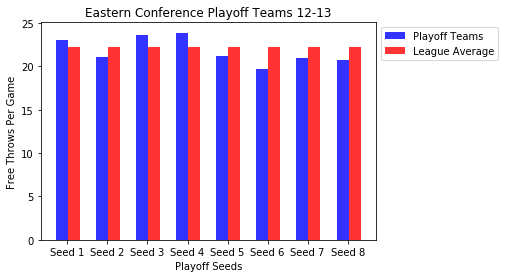

<Figure size 1080x1080 with 0 Axes>

In [61]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1213Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1213Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('Eastern Conference Playoff Teams 12-13')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

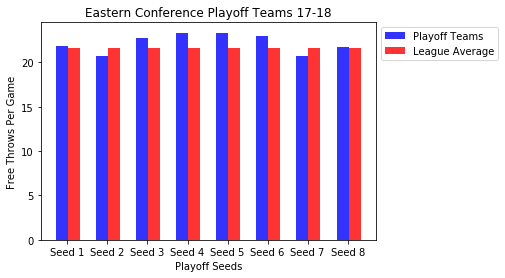

<Figure size 1080x1080 with 0 Axes>

In [62]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1718Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1718Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('Eastern Conference Playoff Teams 17-18')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

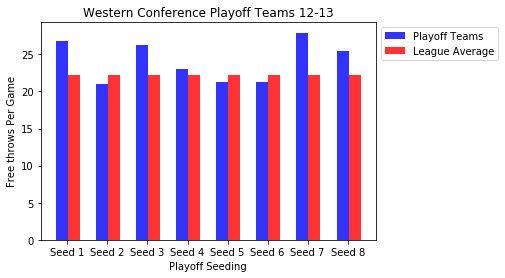

<Figure size 1080x1080 with 0 Axes>

In [63]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1213Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1213Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('Western Conference Playoff Teams 12-13')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

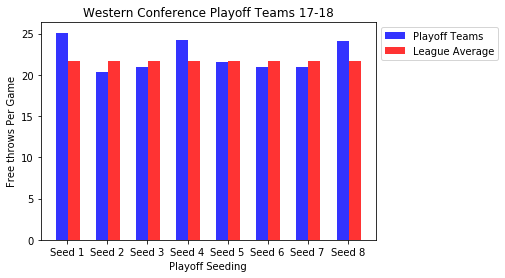

<Figure size 1080x1080 with 0 Axes>

In [64]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1718Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1718Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('Western Conference Playoff Teams 17-18')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

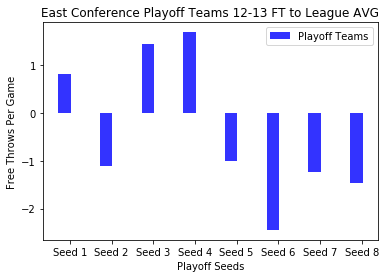

<Figure size 1080x1080 with 0 Axes>

In [70]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1213Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

#rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('East Conference Playoff Teams 12-13 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

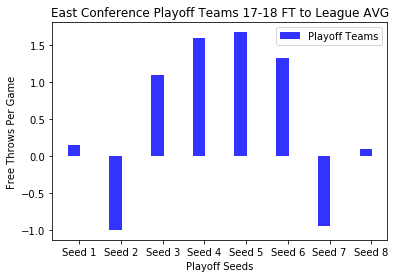

<Figure size 1080x1080 with 0 Axes>

In [71]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1718Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

#rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('East Conference Playoff Teams 17-18 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

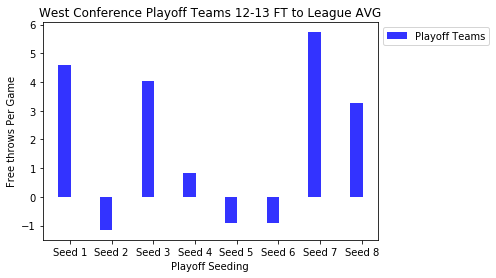

<Figure size 1080x1080 with 0 Axes>

In [72]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1213Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

# rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('West Conference Playoff Teams 12-13 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

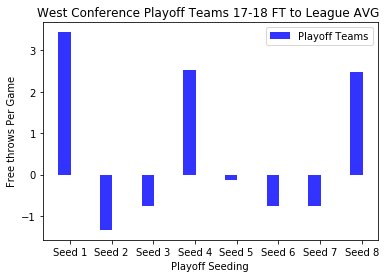

<Figure size 1080x1080 with 0 Axes>

In [73]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1718Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

# rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('West Conference Playoff Teams 17-18 FT to League AVG ')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

In [101]:
# 2012-2013 T-Test Data

East1213Stats = scipy.stats.ttest_1samp(East1213Top8, leagueAVG1213)
West1213Stats = scipy.stats.ttest_1samp(West1213Top8, leagueAVG1213)

dataEast1213 = [[East1213Stats[0], East1213Stats[1]/2]]
East1213_statTable = pd.DataFrame(dataEast1213, columns=['Test Statistic', 'p-value'])

dataWest1213 = [[West1213Stats[0], West1213Stats[1]/2]]
West1213_statTable = pd.DataFrame(dataWest1213, columns=['Test Statistic', 'p-value'])

In [107]:
# 2017-2018 T-Test Data

East1718Stats = scipy.stats.ttest_1samp(East1718Top8, leagueAVG1718)
West1718Stats = scipy.stats.ttest_1samp(West1718Top8, leagueAVG1718)

dataEast1718 = [[East1718Stats[0], East1718Stats[1]/2]]
East1718_statTable = pd.DataFrame(dataEast1718, columns=['Test Statistic', 'p-value'])

dataWest1718 = [[West1718Stats[0], West1718Stats[1]/2]]
West1718_statTable = pd.DataFrame(dataWest1718, columns=['Test Statistic', 'p-value'])

# East Playoff Teams 12-13 T-Test Results


In [108]:
East1213_statTable

,Test Statistic,p-value
0,-0.759076,0.236294


# East Playoff Teams 17-18 T-Test Results

In [109]:
East1718_statTable

,Test Statistic,p-value
0,1.314815,0.115004


# West Playoff Teams 12-13 T-Test Results

In [110]:
West1213_statTable

,Test Statistic,p-value
0,1.961229,0.045328


# West Playoff Teams 17-18 T-Test Results

In [111]:
West1718_statTable

,Test Statistic,p-value
0,0.876004,0.205039
